# Shor's Algorithm can be divided into various steps

### First Step: Order Finding

Let's take an example where we will plot all the values of $x^{i}(mod N)$ for given values of x = 5 and N = 21. The least positive integer value will be our result for the order for this example for a range of value of i in 50 first positive integer

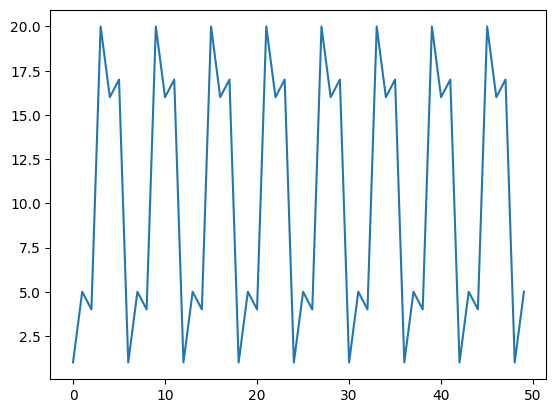

In [1]:
import matplotlib.pyplot as plt

x = 5
N = 21
l = []

for i in range(50):
    l.append((x**i) % N)

plt.plot(l)
plt.show()

In [2]:
#Let us take a back and do the calculation for Quantum Phase Estimation of S-Gate

In [4]:
import qiskit
qiskit.__version__

'1.1.0'

In [56]:
import matplotlib.pyplot as plt
import numpy as np
import math

from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile, assemble
from qiskit.visualization import plot_histogram
from qiskit_aer import Aer




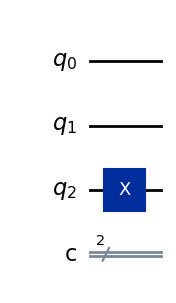

In [60]:
#Creating the circuit
qpe = QuantumCircuit(3, 2)
qpe.x(2)
qpe.draw('mpl')

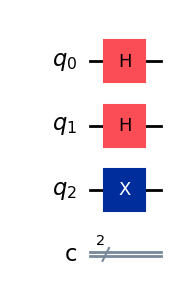

In [61]:
#Applying the Hadamard to the counting qubits to create a superposition state for the result of the summation

for qubit in range(2):
    qpe.h(qubit)

qpe.draw('mpl')

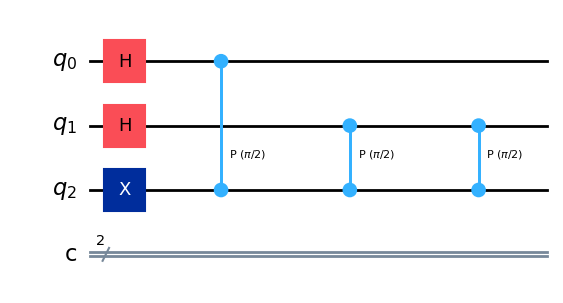

In [62]:
#Now performing the controlled Unitary Operations which applies on the state |1>

repetitions = 1
for counting_qubits in range(2):
    for i in range(repetitions):
        qpe.cp(math.pi/2, counting_qubits, 2);
    repetitions *= 2
qpe.draw('mpl')

In [63]:
#Now we have to apply the Inverse Quantum Fourier Transform to the counting qubits
#To take into account the state |2^n(theta)>

def qpe_dagger(qc, n):
    for qubit in range(n//2):
        qc.swap(qubit, n-qubit-1)
        for j in range(n):
            for m in range(j):
                qc.cp(-math.pi/float(2**(j-m)), m, j)

            qc.h(j)

qpe.barrier()
qpe_dagger(qpe, 2)
qpe.barrier()
for n in range(2):
    qpe.measure(n, n)
        

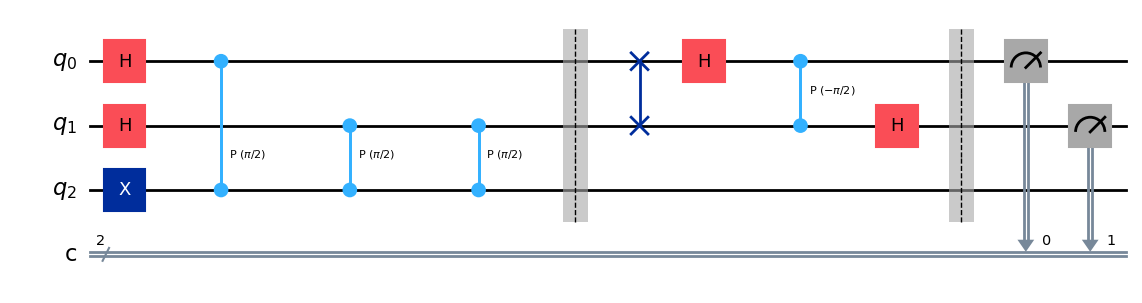

In [64]:
qpe.draw('mpl')

C:\Users\jrnat\AppData\Local\Temp\ipykernel_24608\2605591276.py:5: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.14 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  results = aer_sim.run(qobj).result()


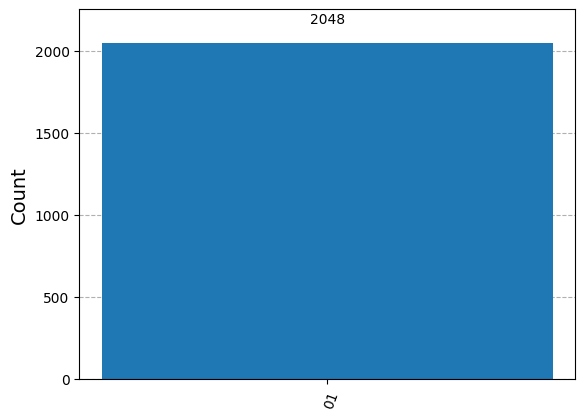

In [65]:
aer_sim = Aer.get_backend('aer_simulator')
shots = 2048
t_qpe = transpile(qpe, aer_sim)
qobj = assemble(t_qpe, shots=shots)
results = aer_sim.run(qobj).result()
answer = results.get_counts()

plot_histogram(answer)

In [73]:
#Some learnings from the Quantum Fourier Transform
"""
Write a method named myQFT that takes a list of qubits and then returns the circuit implementing QFT on those qubits.

Test your method with three and four qubits.

Print your circuits and compare them with our solutions.

In our case, by letting 𝑡=2/2𝑚 we can create the gate 𝐶𝑅𝑚

"""
import cirq
from cirq import H, SWAP
from math import pi


def myQFT(qubits):
    #Appylying the hadamard Transformations
    n = len(qubits)
    circuit = cirq.Circuit()
    for i in range(n):
        circuit.append(H(qubits[i]))
    #Applying the Controlled Phase Estimation
        phase_divisor = 4 #4,8,16,32...
        for j in range(i+1, n):
            circuit.append(cirq.CZPowGate(exponent=1/phase_divisor).on(qubits[j], qubits[i]))
            phase_divisor *= 2

    #SWAP Gates for final result
    for j in range(n//2):
        circuit.append(SWAP(qubits[j], qubits[n-j-1]))
    return circuit



In [76]:
#Example
qubits = cirq.LineQubit.range(3)

my_circuit = myQFT(qubits)

print(my_circuit)

                   ┌────────┐
0: ───H───@─────────@────────────────────────×───
          │         │                        │
1: ───────@^0.25────┼──────H────@────────────┼───
                    │           │            │
2: ─────────────────@^(1/8)─────@^0.25───H───×───
                   └────────┘


In [77]:
#Built In QFT Method Cirq

import cirq
qubits = cirq.LineQubit.range(3)
circuit = cirq.Circuit()
builtin_qft = circuit + cirq.qft(*qubits, without_reverse = False)
print(builtin_qft)

0: ───qft───
      │
1: ───#2────
      │
2: ───#3────


In [80]:
import cirq
from cirq import X
n = 3

inputs = ['000','001','010','011','100','101','110','111']

for input in inputs:
    print("========= input is",input," ==========")

    qft_circuit = cirq.Circuit()

    qubits = cirq.LineQubit.range(n)

    if input[0] == '1': qft_circuit.append(X.on(qubits[0]))
    if input[1] == '1': qft_circuit.append(X.on(qubits[1]))
    if input[2] == '1': qft_circuit.append(X.on(qubits[2]))

    #Applying the QFT builtin circuit
    builtin_circuit = circuit + cirq.qft(*qubits,without_reverse=False)

    #Simulate the circuits
    results = cirq.Simulator().simulate(builtin_circuit)
    builtin_circuit_state = results.dirac_notation()


    #Final State
    print(builtin_circuit_state)
    


========= input is 000  ==========
0.35|000⟩ + 0.35|001⟩ + 0.35|010⟩ + 0.35|011⟩ + 0.35|100⟩ + 0.35|101⟩ + 0.35|110⟩ + 0.35|111⟩
========= input is 001  ==========
0.35|000⟩ + 0.35|001⟩ + 0.35|010⟩ + 0.35|011⟩ + 0.35|100⟩ + 0.35|101⟩ + 0.35|110⟩ + 0.35|111⟩
========= input is 010  ==========
0.35|000⟩ + 0.35|001⟩ + 0.35|010⟩ + 0.35|011⟩ + 0.35|100⟩ + 0.35|101⟩ + 0.35|110⟩ + 0.35|111⟩
========= input is 011  ==========
0.35|000⟩ + 0.35|001⟩ + 0.35|010⟩ + 0.35|011⟩ + 0.35|100⟩ + 0.35|101⟩ + 0.35|110⟩ + 0.35|111⟩
========= input is 100  ==========
0.35|000⟩ + 0.35|001⟩ + 0.35|010⟩ + 0.35|011⟩ + 0.35|100⟩ + 0.35|101⟩ + 0.35|110⟩ + 0.35|111⟩
========= input is 101  ==========
0.35|000⟩ + 0.35|001⟩ + 0.35|010⟩ + 0.35|011⟩ + 0.35|100⟩ + 0.35|101⟩ + 0.35|110⟩ + 0.35|111⟩
========= input is 110  ==========
0.35|000⟩ + 0.35|001⟩ + 0.35|010⟩ + 0.35|011⟩ + 0.35|100⟩ + 0.35|101⟩ + 0.35|110⟩ + 0.35|111⟩
========= input is 111  ==========
0.35|000⟩ + 0.35|001⟩ + 0.35|010⟩ + 0.35|011⟩ + 0.35|100⟩ + 0.

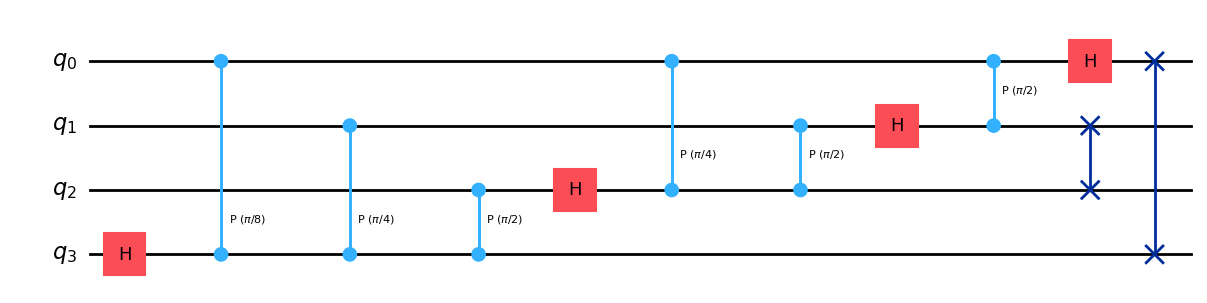

In [115]:
#General QFT Function as used in qiskit

import numpy as np
from qiskit import QuantumCircuit, transpile, QuantumRegister
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor

def qft_rotations(circuit, n):
    """Performs qft on the first n qubits in circuit (without swaps)"""
    if n == 0:
        return circuit
    n -= 1
    circuit.h(n)
    for qubit in range(n):
        circuit.cp(pi/2**(n-qubit), qubit, n)
    # At the end of our function, we call the same function again on
    # the next qubits (we reduced n by one earlier in the function)
    qft_rotations(circuit, n)

def swap_registers(circuit, n):
    for qubit in range(n//2):
        circuit.swap(qubit, n-qubit-1)
    return circuit

def qft(circuit, n):
    """QFT on the first n qubits in circuit"""
    qft_rotations(circuit, n)
    swap_registers(circuit, n)
    return circuit

qc = QuantumCircuit(4)
qft(qc,4)
qc.draw('mpl')

In [125]:
#Implementing in the simulator 


n = 3
inputs = ['000','001','010','011','100','101','110','111']

qc = QuantumCircuit(n)



for input_state in inputs:
    qc = QuantumCircuit(n)
    for idx, bit in enumerate(input_state):
        if bit == '1':
            qc.x(idx)

#The simulator 
    sim = Aer.get_backend('aer_simulator')
    qc_init = qc.copy()
    qc_init.save_statevector()
    state_vector = sim.run(qc_init).result().get_statevector()


    qft(qc, n)
    qc.draw()




Input state: 000
State vector after QFT: Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j],
            dims=(2, 2, 2))


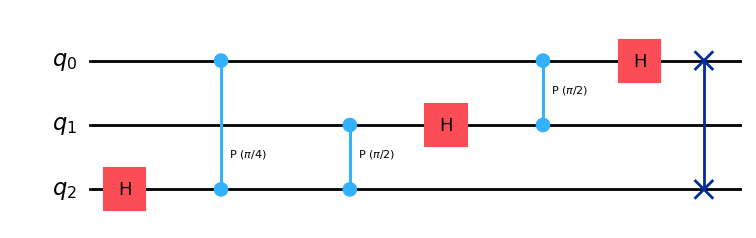

Input state: 001
State vector after QFT: Statevector([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j],
            dims=(2, 2, 2))


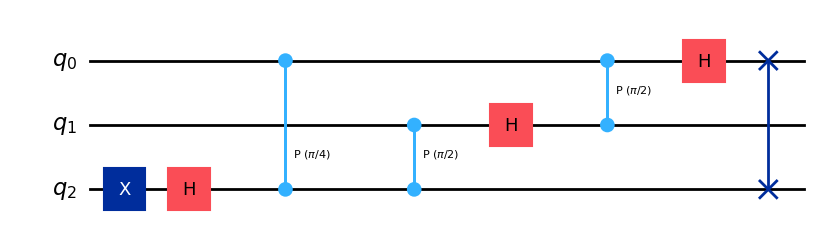

Input state: 010
State vector after QFT: Statevector([0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j],
            dims=(2, 2, 2))


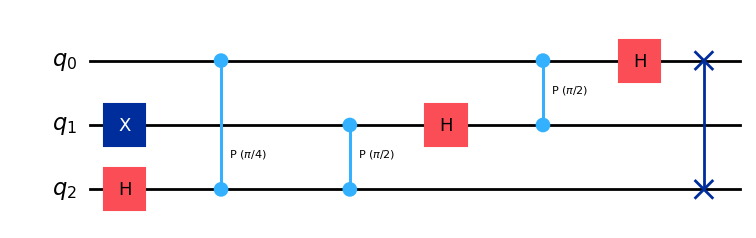

Input state: 011
State vector after QFT: Statevector([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j,
             0.+0.j],
            dims=(2, 2, 2))


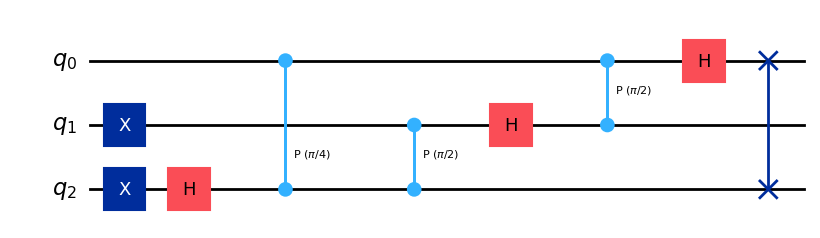

Input state: 100
State vector after QFT: Statevector([0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j],
            dims=(2, 2, 2))


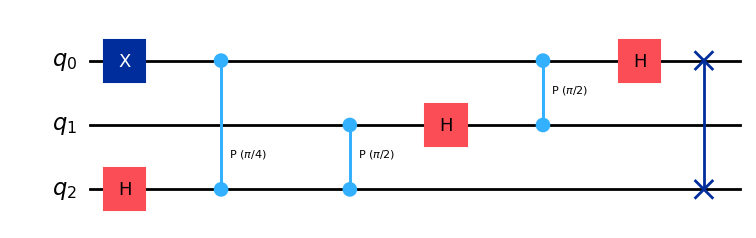

Input state: 101
State vector after QFT: Statevector([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j,
             0.+0.j],
            dims=(2, 2, 2))


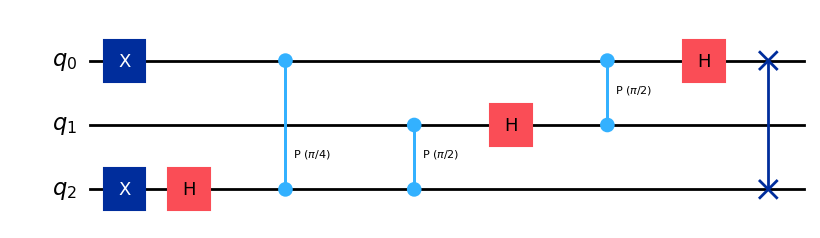

Input state: 110
State vector after QFT: Statevector([0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j],
            dims=(2, 2, 2))


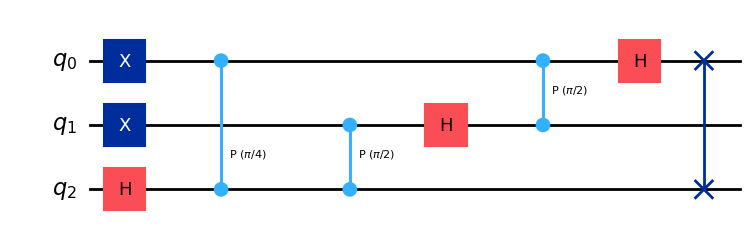

Input state: 111
State vector after QFT: Statevector([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             1.+0.j],
            dims=(2, 2, 2))


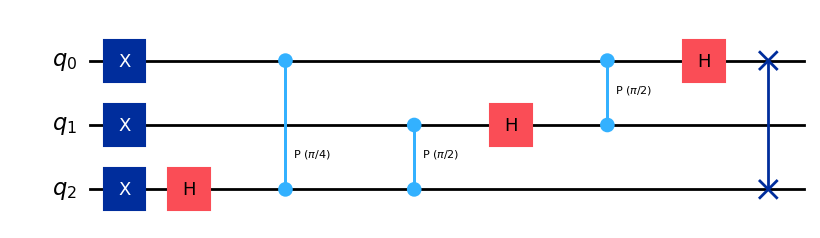

In [164]:
qc.clear()

import numpy as np
from qiskit import QuantumCircuit, transpile, QuantumRegister
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor

def qft_rotations(circuit, n):
    """Performs qft on the first n qubits in circuit (without swaps)"""
    if n == 0:
        return circuit
    n -= 1
    circuit.h(n)
    for qubit in range(n):
        circuit.cp(np.pi/2**(n-qubit), qubit, n)
    qft_rotations(circuit, n)
    return circuit

def swap_registers(circuit, n):
    for qubit in range(n//2):
        circuit.swap(qubit, n-qubit-1)
    return circuit

def qft(circuit, n):
    """QFT on the first n qubits in circuit"""
    qft_rotations(circuit, n)
    swap_registers(circuit, n)
    return circuit

# Implementing in the simulator
n = 3
inputs = ['000', '001', '010', '011', '100', '101', '110', '111']

for input_state in inputs:
    qc = QuantumCircuit(n)
    for idx, bit in enumerate(input_state):
        if bit == '1':
            qc.x(idx)

    # The simulator
    sim = Aer.get_backend('aer_simulator')
    qc_init = qc.copy()
    qc_init.save_statevector()
    state_vector = sim.run(qc_init).result().get_statevector()

    qft(qc, n)
    # Drawing the circuit for each input
    print(f"Input state: {input_state}")
    print("State vector after QFT:", state_vector)
    display(qc.draw('mpl'))

In [161]:
from qiskit_ibm_provider import IBMProvider
IBMProvider.save_account('d8e238b032a29743135ea42b973f91dee0c3a9c0767fa8663ad7ad4c8fc1e84aa8dba5a9e6827a365c6d93db672ce395192d9b094618a801f36164d18465c42e', overwrite =True)
provider = IBMProvider()



In [162]:
backends = provider.backends()

from qiskit.providers.ibmq import least_busy

simulator_backend = least_busy(provider.backends(operational = True, simulator = False))


In [163]:
shots = 2048
transpiled_qc = transpile(qc, simulator_backend, optimization_level=3)
job = simulator_backend.run(transpiled_qc, shots=shots)
job_monitor(job)

Job Status: job has successfully run


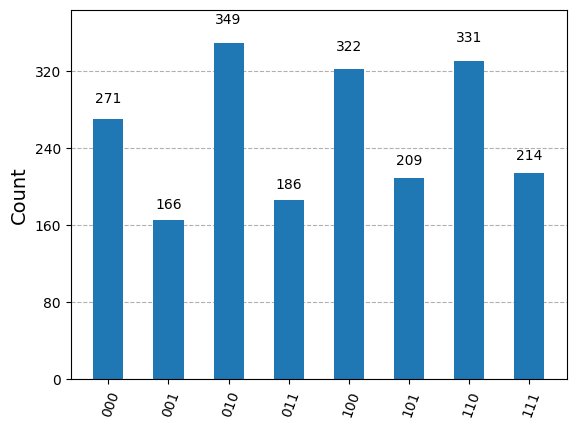

In [165]:
counts = job.result().get_counts()
plot_histogram(counts)

## Phase Estimation Learning

In [171]:
#We take t = 4, phi = 5/16
#So exponent will be 2*(5/16)*2**power

import cirq
from cirq import H, SWAP, CZPowGate
from cirq.circuits import InsertStrategy

def CU(power, qcontrol, target):
    circuit = cirq.Circuit()
    
    circuit.append(CZPowGate(exponent = (2*5/16)*(2**power)).on(qcontrol, *target))
    return circuit

def myInvQFT(qubits):

    circuit = cirq.Circuit() # create a circuit
    
    n = len(qubits)
    
    # swap the qubits
    for j in range(n//2): # integer division
        circuit.append(SWAP.on(qubits[j],qubits[n-j-1]), strategy = InsertStrategy.NEW)
    
    
    # inverted phase gates are applied in reverse order and before the hadamard gate
    
    for i in range(n-1,-1,-1):
        
        phase_divisor = 2**(n-i)
        for j in range(n-1,i,-1):
            circuit.append(CZPowGate(exponent = -2/phase_divisor).on(qubits[j],qubits[i]),
                           strategy = InsertStrategy.NEW)
            phase_divisor = phase_divisor / 2
        
        circuit.append(H(qubits[i]), strategy = InsertStrategy.NEW) # strategy is for the circuit to look neat
    
    return circuit

In [172]:
import cirq
from cirq import X, measure

# Create circuit
circuit = cirq.Circuit()

t = 4 # Number of qubits in the control register
n = 1 # Number of qubits in the register storing eigenvector

# Create t control qubits
control = [cirq.LineQubit(i) for i in range(t) ]

# Create n target qubits
target = [cirq.LineQubit(i) for i in range(t,t+n) ]

# Apply Hadamard gates to the qubits on the first register (control)
circuit.append(cirq.H.on_each(control))

# Set the second register (target) to state |1> 
circuit.append(X.on_each(target))

# apply CU^(2^j) operators
for j in range(t):
    circuit += CU(j, control[t-j-1], target)

# print the circuit before InvQFT
print(circuit)

# the algorithm has been described for the qubit order q0⊗q1⊗q2⊗q3
circuit += myInvQFT(control)

# Measure
circuit.append(measure(*control, key='result'))


# Simulate the circuit
sim = cirq.Simulator()
results_sim = sim.simulate(circuit)
circuit_state = results_sim.dirac_notation()

print(circuit_state) # circuit state

# Execute the circuit
samples = sim.run(circuit, repetitions=1000)
print()
print(samples.histogram(key='result')) # output in decimal form, default in Cirq



# default representation in Cirq is with decimal numbers
# with this function we convert the decimal numbers into binary (bitstrings)
def bitstring(bits):
    return "".join(str(int(b)) for b in bits)

print()
print(samples.histogram(key='result', fold_func=bitstring)) # output should be {'0101': 1000} => 5 => phi = 5/16

0: ───H───────────────────────────────@───
                                      │
1: ───H───────────────────────@───────┼───
                              │       │
2: ───H─────────────@─────────┼───────┼───
                    │         │       │
3: ───H───@─────────┼─────────┼───────┼───
          │         │         │       │
4: ───X───@^(5/8)───@^-0.75───@^0.5───@───
|01011⟩

Counter({5: 1000})

Counter({'0101': 1000})


In [174]:
#Lets do it for 3 control registers in this case we have to use t = 3

import cirq

from cirq import X, H, SWAP, CZPowGate, measure

def CU(power, qcontrol, target):
    circuit = cirq.Circuit()

    circuit.append(CZPowGate(exponent = (2*5/16)*(2**power)).on(qcontrol, *target))

    return circuit

def InvQFT(qubits):
    circuit = cirq.Circuit()

    n = len(qubits)

    for j in range(n//2):
        circuit.append(SWAP.on(qubits[j], qubits[n-j-1]), strategy = InsertStrategy.NEW)

    for i in range(n-1, -1, -1):
        phase_divisor = 2**(n-i)
        for j in range(n-1, i, -1):
            circuit.append(CZPowGate(exponent = -2/phase_divisor).on(qubits[j], qubits[i]), strategy = InsertStrategy.NEW)
            phase_divisor = phase_divisor / 2

        circuit.append(H(qubits[i]), strategy = InsertStrategy.NEW)

    return circuit

#NOW CREATING THE CIRCUIT FOR THE t = 3 control qubits
import cirq
from cirq import X, measure

# Create circuit
circuit = cirq.Circuit()

t = # Number of qubits in the control register
n = 1 # Number of qubits in the register storing eigenvector

# Create t control qubits
control = [cirq.LineQubit(i) for i in range(t) ]

# Create n target qubits
target = [cirq.LineQubit(i) for i in range(t,t+n) ]

# Apply Hadamard gates to the qubits on the first register (control)
circuit.append(cirq.H.on_each(control))

# Set the second register (target) to state |1> 
circuit.append(X.on_each(target))

# apply CU^(2^j) operators
for j in range(t):
    circuit += CU(j, control[t-j-1], target)

# print the circuit before InvQFT
print(circuit)

# the algorithm has been described for the qubit order q0⊗q1⊗q2⊗q3
circuit += myInvQFT(control)

# Measure
circuit.append(measure(*control, key='result'))


# Simulate the circuit
sim = cirq.Simulator()
results_sim = sim.simulate(circuit)
circuit_state = results_sim.dirac_notation()

print(circuit_state) # circuit state

# Execute the circuit
samples = sim.run(circuit, repetitions=1000)
print()
print(samples.histogram(key='result')) # output in decimal form, default in Cirq



# default representation in Cirq is with decimal numbers
# with this function we convert the decimal numbers into binary (bitstrings)
def bitstring(bits):
    return "".join(str(int(b)) for b in bits)

print()
print(samples.histogram(key='result', fold_func=bitstring)) # output should be {'0101': 1000} => 5 => phi = 5/16

0: ───H───────────────────────@───────
                              │
1: ───H─────────────@─────────┼───────
                    │         │
2: ───H───@─────────┼─────────┼───────
          │         │         │
3: ───X───@^(5/8)───@^-0.75───@^0.5───
(0.2-0.98j)|0111⟩

Counter({3: 413, 2: 411, 1: 55, 4: 45, 0: 26, 6: 21, 5: 16, 7: 13})

Counter({'011': 413, '010': 411, '001': 55, '100': 45, '000': 26, '110': 21, '101': 16, '111': 13})


# Quantum Order Finding Algorithm


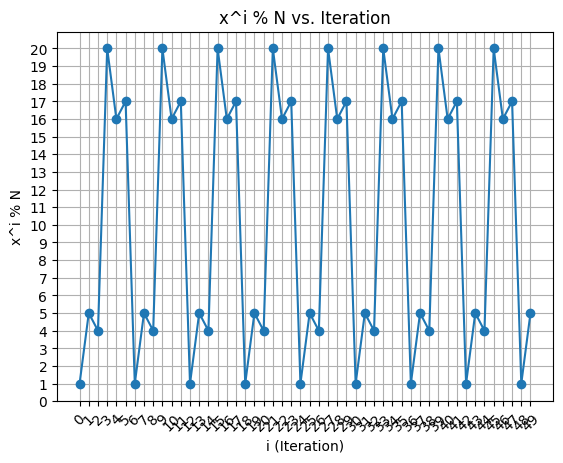

In [177]:
#Consider x = 5, N = 21

#Find the smallest i, for which x^i = 1(mod N)
import matplotlib.pyplot as plt

x = 5
N = 21

l = []

for i in range(50):
    l.append(x**i % N)

# Create the plot
plt.plot(l, marker='o')

# Add labels to the x-axis and y-axis
plt.xlabel('i (Iteration)')
plt.ylabel('x^i % N')
plt.title('x^i % N vs. Iteration')

# Set x-axis ticks
plt.xticks(range(0, 50, 1), rotation=45)  # More detailed ticks

# Set y-axis ticks
plt.yticks(range(0, N, 1))  # More detailed ticks for y-axis

# Add grid for better readability
plt.grid(True)

# Show the plot
plt.show()


In [14]:
#Continued fraction for 31/23

quantum_file = "shor.py"

%run $quantum_file

cf = contFrac(31/13)
print(cf)

[2, 2, 1, 1, 2]


In [182]:
cv = convergents([2,2,1,1,2])
print(cv)

[Fraction(2, 1), Fraction(5, 2), Fraction(7, 3), Fraction(12, 5), Fraction(31, 13)]


# Modular Exponentiation

You are given a function named `opUx` which returns the gate implementing:

$U_x|y\rangle \rightarrow |xy \bmod N\rangle$

In [10]:
from math import ceil, log2, pi

N = 20

x = 3

L = ceil(log2(N))

e = 0.1

t = 2*L + 1 + ceil(log2(2 + 1/(2*e)))

print("N = ", N)
print("x = ", x)
print("L = ", L)
print("error = ", e)
print("t = ", t)

N =  20
x =  3
L =  5
error =  0.1
t =  14


In [11]:
import cirq
import cirq.circuits
import numpy as np
from cirq import H, SWAP, CZPowGate
from math import pi
from cirq.circuits import InsertStrategy


def opUx(N, x):

    k = 1
    while(N > 2**k):
        k = k + 1
        
    u = np.zeros([2**k, 2**k], dtype = int)

    for i in range(N):
        u[x*i % N][i] = 1
    for i in range(N, 2**k):
        u[i][i] = 1

    return cirq.MatrixGate(u, name='Ux').controlled()


def InvQFT(qubits):

    circuit = cirq.Circuit()

    n = len(qubits)

    for j in range(n//2):
        circuit.append(SWAP.on(qubits[j], qubits[n-j-1]), strategy = InsertStrategy.NEW)

    for i in range(n-1,-1,-1):
        phase_divisor = 2**(n-i)

        for j in range(n-1,i,-1):
            circuit.append(CZPowGate(exponent = -2/phase_divisor).on(qubits[j], qubits[i]), strategy = InsertStrategy.NEW)
            phase_divisor = phase_divisor / 2

        circuit.append(H(qubits[i]), strategy = InsertStrategy.NEW)

    return circuit

In [12]:
# Quantum Phase Estimation Algorithm

import cirq
from cirq import X, measure


circuit = cirq.Circuit()

reg1 = [cirq.LineQubit(i) for i in range(t) ]
reg2 = [cirq.LineQubit(i) for i in range(t, t+L) ]

# Apply Hadamard gates to the qubits on the first register
circuit.append(cirq.H.on_each(reg1))

# set the last qubit in second register to |1>
circuit.append(X.on_each(reg2[-1]))

Ux = opUx(N, x)
# apply CU^(2^j) operators
for j in range(t):
    Uxj = Ux**(2**j)
    circuit.append(Uxj(reg1[t-j-1], *reg2))

# the algorithm has been described for the qubit order q0⊗...⊗qt-1
circuit += InvQFT(reg1)

# Measure
circuit.append(measure(*reg1, key='result'))

# Execute the circuit
sim = cirq.Simulator()
samples = sim.run(circuit, repetitions=1000)



# default representation in Cirq is with decimal numbers
# with this function we convert the decimal numbers into binary (bitstrings)
def bitstring(bits):
    return "".join(str(int(b)) for b in bits)



print("outcomes in binary:")
print(samples.histogram(key='result', fold_func=bitstring))
print()
print("outcomes in decimal:")
outcomes = samples.histogram(key='result')
print(outcomes) # output in decimal form, default in Cirq
print()
for outcome in outcomes:
    print(outcome, "\tobserved", outcomes[outcome], "times")

outcomes in binary:
Counter({'00000000000000': 262, '10000000000000': 249, '01000000000000': 249, '11000000000000': 240})

outcomes in decimal:
Counter({0: 262, 8192: 249, 4096: 249, 12288: 240})

8192 	observed 249 times
12288 	observed 240 times
0 	observed 262 times
4096 	observed 249 times


# Exploring the Algorithm


Let $N=111$. What percentage of the elements that are less than $N$ are relatively prime with $N$? Write a Python code to find out. (You can use gcd function of numpy)

In [27]:
#So we need to find the list of r 
from numpy import gcd

N = 111
rlist = []

for i in range(1, N):
    if gcd(i, N) == 1:
        rlist.append(i)

print(rlist)

[1, 2, 4, 5, 7, 8, 10, 11, 13, 14, 16, 17, 19, 20, 22, 23, 25, 26, 28, 29, 31, 32, 34, 35, 38, 40, 41, 43, 44, 46, 47, 49, 50, 52, 53, 55, 56, 58, 59, 61, 62, 64, 65, 67, 68, 70, 71, 73, 76, 77, 79, 80, 82, 83, 85, 86, 88, 89, 91, 92, 94, 95, 97, 98, 100, 101, 103, 104, 106, 107, 109, 110]


Calculate the order of each element $ x $ that is relatively prime with $N $. 

What percentage of the $ x $’s have even order and satisfy 
$x^{r/2} \neq -1 (mod N)$?

Put the elements that satisfy the conditions in a dictionary together with their order.

In [28]:
import numpy as np
counter=0
#This will hold the list of integers that satisfy the conditions together with the order
satisfy={}

#rlist contains the relatively prime numbers with N        
for i in range(len(rlist)):
    r=1;
    while(1):
        if (rlist[i]**r)%N==1:
            if(r%2==0 and ((rlist[i]**int(r/2))%N != N-1)):
                counter=counter+1
                print("Order of",rlist[i],":",r)
                satisfy[rlist[i]]=r
            break
        r=r+1
    
print(counter*100/N, "percentage of the integers satisfy the conditions")        

Order of 2 : 36
Order of 4 : 18
Order of 5 : 36
Order of 8 : 12
Order of 13 : 36
Order of 14 : 12
Order of 17 : 36
Order of 19 : 36
Order of 20 : 36
Order of 22 : 36
Order of 23 : 12
Order of 25 : 18
Order of 26 : 6
Order of 28 : 18
Order of 29 : 12
Order of 31 : 4
Order of 32 : 36
Order of 35 : 36
Order of 38 : 2
Order of 40 : 18
Order of 43 : 4
Order of 44 : 18
Order of 47 : 6
Order of 50 : 36
Order of 52 : 36
Order of 53 : 18
Order of 55 : 36
Order of 56 : 36
Order of 58 : 18
Order of 59 : 36
Order of 61 : 36
Order of 64 : 6
Order of 67 : 18
Order of 68 : 4
Order of 71 : 18
Order of 73 : 2
Order of 76 : 36
Order of 79 : 36
Order of 80 : 4
Order of 82 : 12
Order of 83 : 18
Order of 85 : 6
Order of 86 : 18
Order of 88 : 12
Order of 89 : 36
Order of 91 : 36
Order of 92 : 36
Order of 94 : 36
Order of 97 : 12
Order of 98 : 36
Order of 103 : 12
Order of 106 : 36
Order of 107 : 18
Order of 109 : 36
48.648648648648646 percentage of the integers satisfy the conditions


Pick randomly one of the $x$ you found in Task 2 and calculate gcd 
$(x^{r/2}-1,N)$ and gcd $(x^{r/2}+1,N)$. 

In [35]:
from numpy import gcd
import numpy as np
import random

N = 111
rlist = []

# Generate list of numbers relatively prime to N
for i in range(1, N):
    if gcd(i, N) == 1:
        rlist.append(i)

print(rlist)

counter = 0
# Dictionary to hold integers and their orders
satisfy = {}

# Find the order of each number in rlist
for i in range(len(rlist)):
    r = 1
    while True:
        if (rlist[i]**r) % N == 1:
            if r % 2 == 0 and (rlist[i]**(r // 2)) % N != N - 1:
                counter += 1
                print("Order of", rlist[i], ":", r)
                satisfy[rlist[i]] = r
            break
        r += 1

print(counter * 100 / N, "percentage of the integers satisfy the conditions")

# Pick a random x and its order from the dictionary
x, r = random.choice(list(satisfy.items()))
print(x, "is picked with order", r)

# Calculate gcd
factor1 = np.gcd(x**(r // 2) - 1, N)
factor2 = np.gcd(x**(r // 2) + 1, N)
print("Factors of", N, ":", factor1, "and", factor2)


[1, 2, 4, 5, 7, 8, 10, 11, 13, 14, 16, 17, 19, 20, 22, 23, 25, 26, 28, 29, 31, 32, 34, 35, 38, 40, 41, 43, 44, 46, 47, 49, 50, 52, 53, 55, 56, 58, 59, 61, 62, 64, 65, 67, 68, 70, 71, 73, 76, 77, 79, 80, 82, 83, 85, 86, 88, 89, 91, 92, 94, 95, 97, 98, 100, 101, 103, 104, 106, 107, 109, 110]
Order of 2 : 36


IndexError: list assignment index out of range

### Please fix the error in the above code

Factor 21 by using Shor's Algorithm.

- Pick a random $x$ which is relatively prime with 21.
- Apply phase estimation circuit to the operator $U_x$.
- Use continued fractions algorithm to find out $r$.
- Compute $gcd(x^{r/2} -1, N)$ and $gcd(x^{r/2}+1, N)$

In [42]:
N = 21 #Given Number


#Pick a random x relatively prime with N

import random as rand
import numpy as np

counter = 0

while(True):
    x = rand.randrange(2,N)
    counter = counter + 1
    if np.gcd(x,N)==1:
        break
        
print(x, " is picked after ", counter, " trials")    

11  is picked after  1  trials


In [43]:
from math import ceil, log2, pi

N = 21

e = 0.1

L = ceil(log2(N))

t = 2*L + 1 + ceil(log2(2 + 1/(2*e)))

print("N = ", N)
print("error = ", e)
print("t = ", t)
print("L = ", L)

N =  21
error =  0.1
t =  14
L =  5


In [53]:
import cirq
from cirq import H, SWAP
from cirq.circuits import InsertStrategy
from math import pi
import numpy as np


def opUx(N, x):
    
    k = 1
    while(N > 2**k):
        k = k + 1
    u = np.zeros([2**k, 2**k], dtype = int) 
    for i in range(N):
        u[x*i % N][i] = 1
    for i in range(N, 2**k):
        u[i][i] = 1
    return cirq.MatrixGate(u, name='Ux').controlled()


def myInvQFT(qubits):

    circuit = cirq.Circuit() # create a circuit
    n = len(qubits)
    # swap the qubits
    for j in range(n//2): # integer division
        circuit.append(SWAP.on(qubits[j],qubits[n-j-1]), strategy = InsertStrategy.NEW)
    # inverted phase gates are applied in reverse order and before the hadamard gate
    for i in range(n-1,-1,-1):
        phase_divisor = 2**(n-i)
        for j in range(n-1,i,-1):
            circuit.append(cirq.CZPowGate(exponent = -2/phase_divisor).on(qubits[j],qubits[i]),
                           strategy = InsertStrategy.NEW)
            phase_divisor = phase_divisor / 2
        circuit.append(H(qubits[i]), strategy = InsertStrategy.NEW) # strategy is for the circuit to look neat
    
    return circuit

In [54]:
# Quantum Phase Estimation Algorithm

import cirq
from cirq import X, measure


circuit = cirq.Circuit()

reg1 = [cirq.LineQubit(i) for i in range(t) ]
reg2 = [cirq.LineQubit(i) for i in range(t, t+L) ]

# Apply Hadamard gates to the qubits on the first register
circuit.append(cirq.H.on_each(reg1))

# set the last qubit in second register to |1>
circuit.append(X.on_each(reg2[-1]))

Ux = opUx(N, x)
# apply CU^(2^j) operators
for j in range(t):
    Uxj = Ux**(2**j)
    circuit.append(Uxj(reg1[t-j-1], *reg2))

# the algorithm has been described for the qubit order q0⊗...⊗qt-1
circuit += myInvQFT(reg1)

# Measure
circuit.append(measure(*reg1, key='result'))

# Execute the circuit
sim = cirq.Simulator()
samples = sim.run(circuit, repetitions=1000)



# default representation in Cirq is with decimal numbers
# with this function we convert the decimal numbers into binary (bitstrings)
def bitstring(bits):
    return "".join(str(int(b)) for b in bits)



print("outcomes in binary:")
print(samples.histogram(key='result', fold_func=bitstring))
print()
print("outcomes in decimal:")
outcomes = samples.histogram(key='result')
print(outcomes) # output in decimal form, default in Cirq
print()
for outcome in outcomes:
    print(outcome, "\tobserved", outcomes[outcome], "times")

outcomes in binary:
Counter({'10000000000000': 172, '00000000000000': 156, '11010101010101': 134, '01010101010101': 111, '00101010101011': 106, '10101010101011': 92, '10101010101010': 47, '01010101010110': 34, '11010101010110': 33, '00101010101010': 27, '00101010101100': 10, '10101010101100': 10, '10101010101001': 7, '11010101010111': 6, '11010101010100': 5, '01010101010100': 5, '00101010101000': 3, '10101010101101': 3, '11010101011000': 3, '10101010101000': 3, '01010101010011': 3, '00101010101001': 3, '11010101010001': 2, '00101010101101': 2, '10101010100111': 2, '01010101010111': 2, '00101010110001': 2, '01010101011000': 2, '00101010111010': 1, '00101011000000': 1, '11010101011001': 1, '00101010100110': 1, '00101010100111': 1, '00101010011100': 1, '00101010101110': 1, '11010101010000': 1, '10101010110000': 1, '10101010111000': 1, '11010101001000': 1, '11010101010011': 1, '11010101011110': 1, '10101010101111': 1, '11010101011100': 1})

outcomes in decimal:
Counter({8192: 172, 0: 156, 

In [55]:
good = []
for outcome in outcomes:
    if outcome == 0: continue
    if outcomes[outcome] > 10:
        good.append(outcome)
print(good)

[2731, 8192, 5461, 13653, 13654, 10923, 10922, 5462, 2730]


In [56]:
#Load the contFrac and convergents functions
quantum_file ="shor.py"
%run $quantum_file

#Run continued fractions algorithm to find out r
for b in good:
    print("for b =",b)
    cf = contFrac(b/(2**t))
    print(cf)
    cv = convergents(cf)
    print(cv)
    print()

for b = 2731
[0, 5, 1, 1364, 2]
[Fraction(0, 1), Fraction(1, 5), Fraction(1, 6), Fraction(1365, 8189), Fraction(1366, 8195)]

for b = 8192
[0, 2]
[Fraction(0, 1), Fraction(1, 2)]

for b = 5461
[0, 3, 5461]
[Fraction(0, 1), Fraction(1, 3), Fraction(3333, 10000)]

for b = 13653
[0, 1, 4, 1, 1364, 2]
[Fraction(0, 1), Fraction(1, 1), Fraction(4, 5), Fraction(5, 6), Fraction(6824, 8189), Fraction(6829, 8195)]

for b = 13654
[0, 1, 5, 682, 2]
[Fraction(0, 1), Fraction(1, 1), Fraction(5, 6), Fraction(3411, 4093), Fraction(6827, 8192)]

for b = 10923
[0, 1, 2, 5461]
[Fraction(0, 1), Fraction(1, 1), Fraction(2, 3), Fraction(6667, 10000)]

for b = 10922
[0, 1, 1, 1, 2730]
[Fraction(0, 1), Fraction(1, 1), Fraction(1, 2), Fraction(2, 3), Fraction(5461, 8192)]

for b = 5462
[0, 2, 1, 2730]
[Fraction(0, 1), Fraction(1, 2), Fraction(1, 3), Fraction(2731, 8192)]

for b = 2730
[0, 6, 682, 2]
[Fraction(0, 1), Fraction(1, 6), Fraction(682, 4093), Fraction(1365, 8192)]



In [57]:
#Check if r is even, and x^{r/2} is not equal to -1 Mod N
r = 6  #2
if (r%2==0 and (x**(r/2))%N != -1) :
    print("Proceed")
else:
    print("Repeat the algorithm")

Proceed


In [58]:
#Compute gcd to find out the factors of N
print("N=",N)
print("x=",x)
print("r=",r)
print("(x**int(r/2)-1)=",(x**int(r/2)-1))
print("(x**int(r/2)+1)=",(x**int(r/2)+1))
print("Factors of",N,":",np.gcd((x**int(r/2)-1),N), "and",np.gcd((x**int(r/2)+1),N))

N= 21
x= 11
r= 6
(x**int(r/2)-1)= 1330
(x**int(r/2)+1)= 1332
Factors of 21 : 7 and 3
